# [clone project] [Bitcoin-EDA and Forcasting using PyCaret](https://www.kaggle.com/pralabhpoudel/bitcoin-eda-and-forcasting-using-pycaret) - pralabh poudel

Table of contents
```
1. Importing dataset
2. Filtering bitcoin from dataset
   2-1. checking for null values
   2-2. dropping null values
   2-3. changing unix timestamp into date and time
3. Explanatory data analysis
   3-1. statistics of bitcoin
   3-2. some insights about bitcoin
   3-3. vwap as per time
   3-4. trading volume as per time
   3-5. the number of trades that took place as per time
   3-6. correlation
4. Using pycaret for forcasting close price of bitcoin
   4-1. installing pycaret
   4-2. setting up the model and comparing between different models
   4-3. plotting the best model
```

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/g-research-crypto-forecasting/example_sample_submission.csv
/kaggle/input/g-research-crypto-forecasting/asset_details.csv
/kaggle/input/g-research-crypto-forecasting/example_test.csv
/kaggle/input/g-research-crypto-forecasting/train.csv
/kaggle/input/g-research-crypto-forecasting/supplemental_train.csv
/kaggle/input/g-research-crypto-forecasting/gresearch_crypto/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/g-research-crypto-forecasting/gresearch_crypto/__init__.py


## 1. Importing Dataset

In [2]:
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

In [3]:
crypto_data = pd.read_csv("../input/g-research-crypto-forecasting/train.csv")
crypto_data.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


## 2. Filtering Bitcoin from the dataset

In [4]:
bitcoin = crypto_data.query('Asset_ID==1')
bitcoin.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
2,1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643
10,1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037
18,1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309
26,1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999
34,1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079


### 2-1. Checking for Null Values

In [5]:
#Checking columns with missing data
bitcoin.isnull().sum()

timestamp      0
Asset_ID       0
Count          0
Open           0
High           0
Low            0
Close          0
Volume         0
VWAP           0
Target       304
dtype: int64

### 2-2.Dropping Null Values

In [6]:
#Dropping Null Values and asset id as it is irrelevent
bitcoin = bitcoin.dropna()
bitcoin = bitcoin.drop(columns=['Asset_ID'])

### 2-3. Changing Unix timestamp into Date and Time

In [7]:
#Changing timestamp into date (단위는 '초'(s)까지)
bitcoin['timestamp'] = pd.to_datetime(bitcoin['timestamp'], unit='s')
bitcoin.head()

,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Target
2,2018-01-01 00:01:00,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643
10,2018-01-01 00:02:00,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037
18,2018-01-01 00:03:00,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309
26,2018-01-01 00:04:00,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999
34,2018-01-01 00:05:00,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079


## 3. Explanatory Data Analysis

### 3-1. Statistics of Bitcoin

In [8]:
bitcoin.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,1955978.0,1082.519805,1601.885017,1.000000,299.000000,563.000000,1260.000000,87478.000000
Open,1955978.0,15611.972286,15122.086345,3149.657143,6847.823750,9206.418401,13469.559524,64805.943750
High,1955978.0,15652.668498,15132.708981,3176.910000,6865.000000,9222.810000,13522.287500,64900.000000
Low,1955978.0,15578.890342,15106.943722,3120.000000,6835.160000,9191.630000,13401.000000,64670.530000
Close,1955978.0,15611.972500,15122.113935,3151.545000,6847.718857,9206.437857,13469.756071,64808.537275
Volume,1955978.0,92.861773,155.413616,0.000100,30.213282,52.810735,97.686907,10404.995365
VWAP,1955978.0,15611.851834,15121.966590,3152.325875,6847.830820,9206.370125,13469.534537,64799.822215
Target,1955978.0,-0.000002,0.002014,-0.072556,-0.000816,-0.000019,0.000772,0.092789


### 3-2. Some Insights about Bitcoin

In [9]:
print("The Highest Price in All Time Trades : ", max(bitcoin['High']))
print("The Highest Number of Bitcoin units traded during the minute : ", max(bitcoin['Volume']))
print("The Highest Number of trades that took place : ", max(bitcoin['Count']))

The Highest Price in All Time Trades :  64900.0
The Highest Number of Bitcoin units traded during the minute :  10404.995365107006
The Highest Number of trades that took place :  87478.0


### 3-3. VWAP(Volume Weighted Averaged Price, 거래량 가중 평균가) as per Time

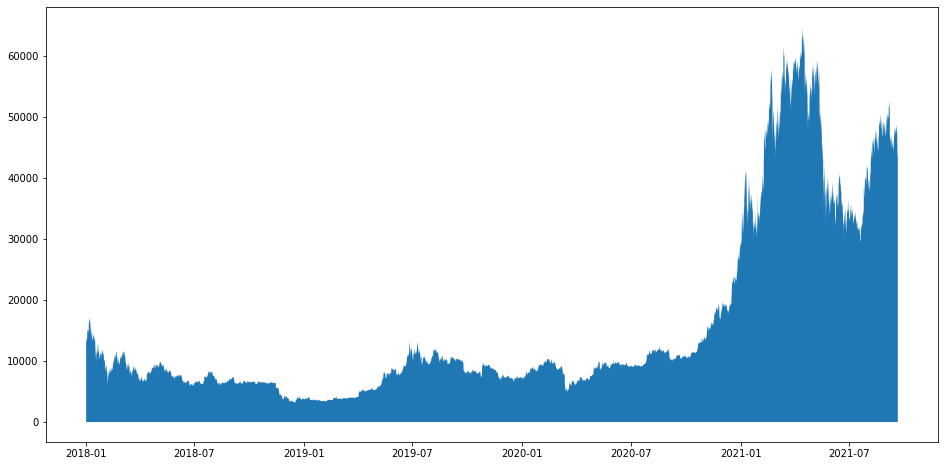

In [10]:
#Plotting VWAP values of Bitcoin
plt.figure(figsize=(16,8))
plt.fill_between(bitcoin['timestamp'], bitcoin['VWAP'])
plt.show()

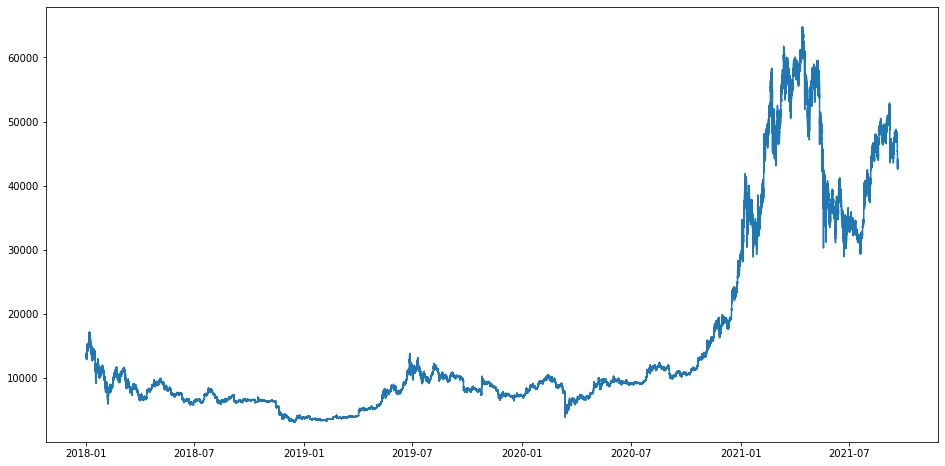

In [11]:
# same graph(not fill)
plt.figure(figsize=(16,8))
plt.plot(bitcoin['timestamp'], bitcoin['VWAP'])
plt.show()

### 3-4. Trading Volume as per Time

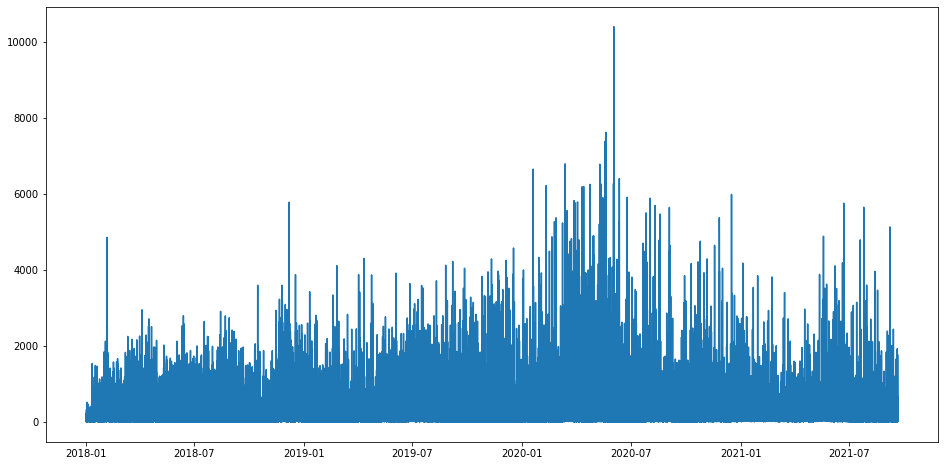

In [12]:
#Ploting Trading Volume of Bitocin
plt.figure(figsize=(16,8))
plt.plot(bitcoin['timestamp'], bitcoin['Volume'])

### 3-5. The Number of Trades that took place as per Time

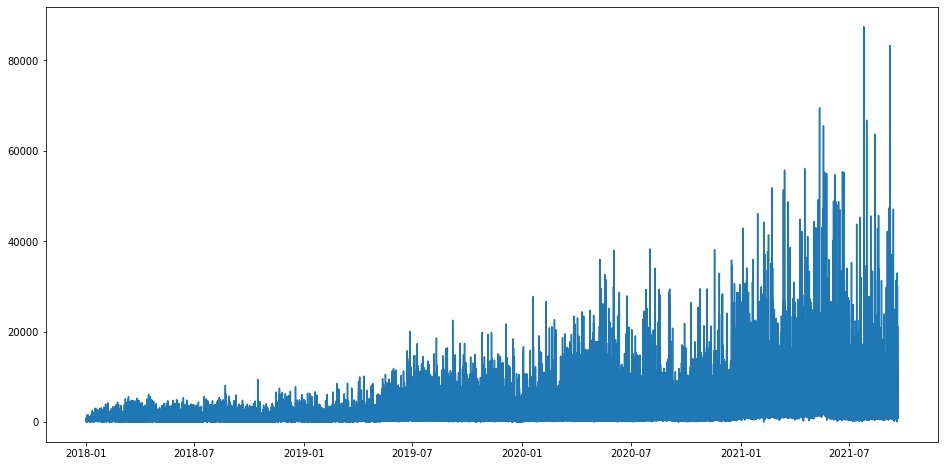

In [13]:
#Plotting The number of trades that took place this minutes
plt.figure(figsize=(16,8))
plt.plot(bitcoin['timestamp'], bitcoin['Count'])

### 3-6. Correlation

<AxesSubplot:>

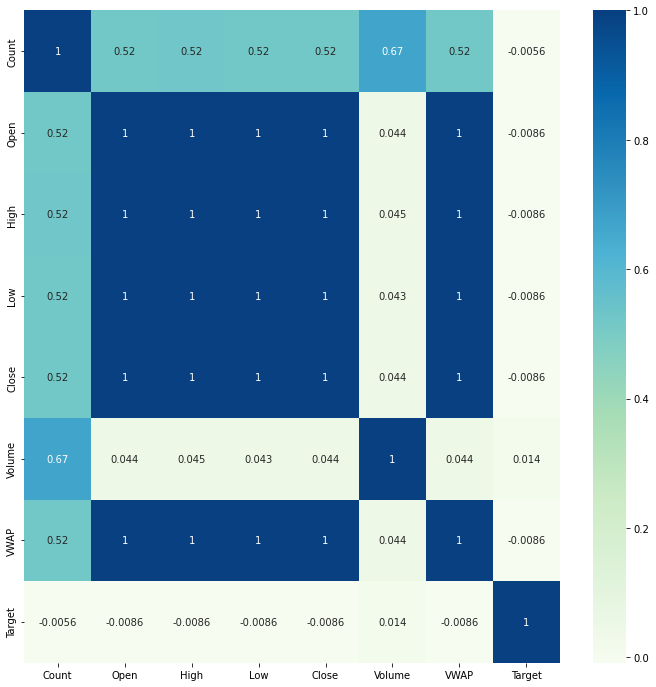

In [14]:
#Calculating Correlation
corr=bitcoin.corr()

#Plotting Correlation
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='GnBu')

## 4. Using PyCaret for Forcasting Close price of Bitcoin

In [15]:
#creating new data for forcasting with time stamp and closing price
close_price = bitcoin[['timestamp', 'Close']].copy()
close_price = close_price.set_index('timestamp')
close_price.head()

,Close
timestamp,
2018-01-01 00:01:00,13850.176
2018-01-01 00:02:00,13828.102
2018-01-01 00:03:00,13801.314
2018-01-01 00:04:00,13768.040
2018-01-01 00:05:00,13724.914


In [16]:
close_price = close_price.asfreq('D')
close_price.head()

,Close
timestamp,
2018-01-01 00:01:00,13850.176
2018-01-02 00:01:00,13463.278
2018-01-03 00:01:00,14747.028
2018-01-04 00:01:00,15117.668
2018-01-05 00:01:00,15161.100


<AxesSubplot:xlabel='timestamp'>

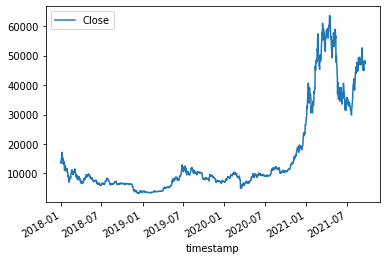

In [17]:
#Plotting  the chart
close_price.plot()

### 4-1. Installing Pycaret

In [18]:
!pip install pycaret-ts-alpha -U

     |████████████████████████████████| 488 kB 882 kB/s            
     |████████████████████████████████| 15.5 MB 26.1 MB/s            
     |████████████████████████████████| 22.3 MB 36.3 MB/s            
     |████████████████████████████████| 113 kB 71.3 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 167 kB 64.6 MB/s            
     |████████████████████████████████| 1.4 MB 57.9 MB/s            
     |████████████████████████████████| 43 kB 1.4 MB/s             
     |████████████████████████████████| 6.2 MB 56.4 MB/s            
     |████████████████████████████████| 636 kB 59.8 MB/s            
     |████████████████████████████████| 24.2 MB 44.2 MB/s            
     |████████████████████████████████| 25.9 MB 48.6 MB/s            
     |████████████████████████████████| 10.4 MB 37.5 MB/s            
     |████████████████████████████████| 6.1 MB 38.6 MB/s            
     |████████████████████████████████| 9.5 MB 58.3 MB/

### 4-2. Setting up the model and comparing between different models

In [19]:
#Setting up for comparing the best model to use with the data.
from pycaret.time_series import *

In [20]:
exp_name = setup(data=close_price, fh=12)


,Description,Value
0,session_id,2115
1,Original Data,"(1359, 1)"
2,Missing Values,False
3,Transformed Train Set,"(1347,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


In [21]:
best_model = compare_models() # Note that we provided seasonal_period manually for annual data

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2,TT (Sec)
arima,ARIMA,1859.5460,2197.6936,0.0402,0.0411,1.4520,-0.0670,0.1967
exp_smooth,Exponential Smoothing,2401.2824,2850.7019,0.0517,0.0535,1.8760,-0.7868,0.1733
snaive,Seasonal Naive Forecaster,2426.8326,2900.5242,0.0518,0.0539,1.8944,-0.9670,0.0100
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,2676.4094,3084.8725,0.0566,0.0589,2.0864,-1.3008,27.7700
ets,ETS,2628.4413,3034.6073,0.0563,0.0590,2.0537,-1.0398,0.1233
theta,Theta Forecaster,2757.2573,3201.2002,0.0589,0.0619,2.1538,-1.2763,0.0200
naive,Naive Forecaster,2896.9598,3370.0565,0.0618,0.0650,2.2622,-1.5576,2.2867
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,2893.1367,3360.3734,0.0618,0.0651,2.2599,-1.5327,0.0500
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,3068.5553,3615.9565,0.0649,0.0682,2.3935,-2.0341,1.7133
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,3042.9884,3535.8744,0.0648,0.0683,2.3757,-1.8229,0.0300


### 4-3. Plotting the best model

In [22]:
plot_model(best_model, plot='insample')

In [23]:
plot_model(best_model, plot='forecast', data_kwargs={'fh':100})